# Final Project

# Topic: Data Mining from the News and building a Network Analysis


#### Team Members:

Name: Amar Kumar Reddy ,akm352@drexel.edu

Name: Astha jain , aj887@drexel.edu

Name: Nupur Roy Chowdhury, nr572@drexel.edu

## Introduction

We live in an age of media and information, where the importance of understanding the intricacies of the News cannot be overstated. 
Building graph representations (i.e. social networks) of data opens up a whole host of possibilities for data science applications, such as finding the most influential individuals on the news or identifying clusters (cliques of people) based on connections. How The sprawling web of politicians, companies look like, using Graph theory and analysing the network representing this vast web of information through news channels.

The fundamental premise behind building our network will be two-fold and quite simple:

1. If two people are mentioned in the same article, they have co-mention relation .

2. The more articles mention the same two people, the closer they are in co-mention relation .


## What are we aiming to achieve:


#### 1. Named Entity Recognition(NLP):


We are going to use Named Entity Recognition, which is a Natural Language Processing task for extracting information from text which recognises entities. This is achieved using statistical models trained on our large dataset, where we make the model learn to recognise and categorise entities based on the context in which they appear in words. We will then be using one of these models for the words tagged as persons, organisations for each article.



#### Example:



If an article mentions Person D and Person B , and two other, separate articles mention Person D and Person A, we’ll say that Person D is friends with Person B, and Person D is also friends with Person A, only twice as much.

We not only get a pictorial representation of the friendship group, we can also start seeing hidden relationships:

although Person A wasn’t mentioned in the same article as Person B, we can guess with some certainty that the two are related (and that they are related via their mutual friend, Person D). We can also tell that Person D is the alpha male in the group, having influence over both person A and Person B.

######          BELOW IS THE EXAMPLE IMAGE WHICH WE HAD CREATED FROM A SAMPLE OF 100 TO SHOW WHAT THE GRAPH WILL LOOK LIKE:
            
            

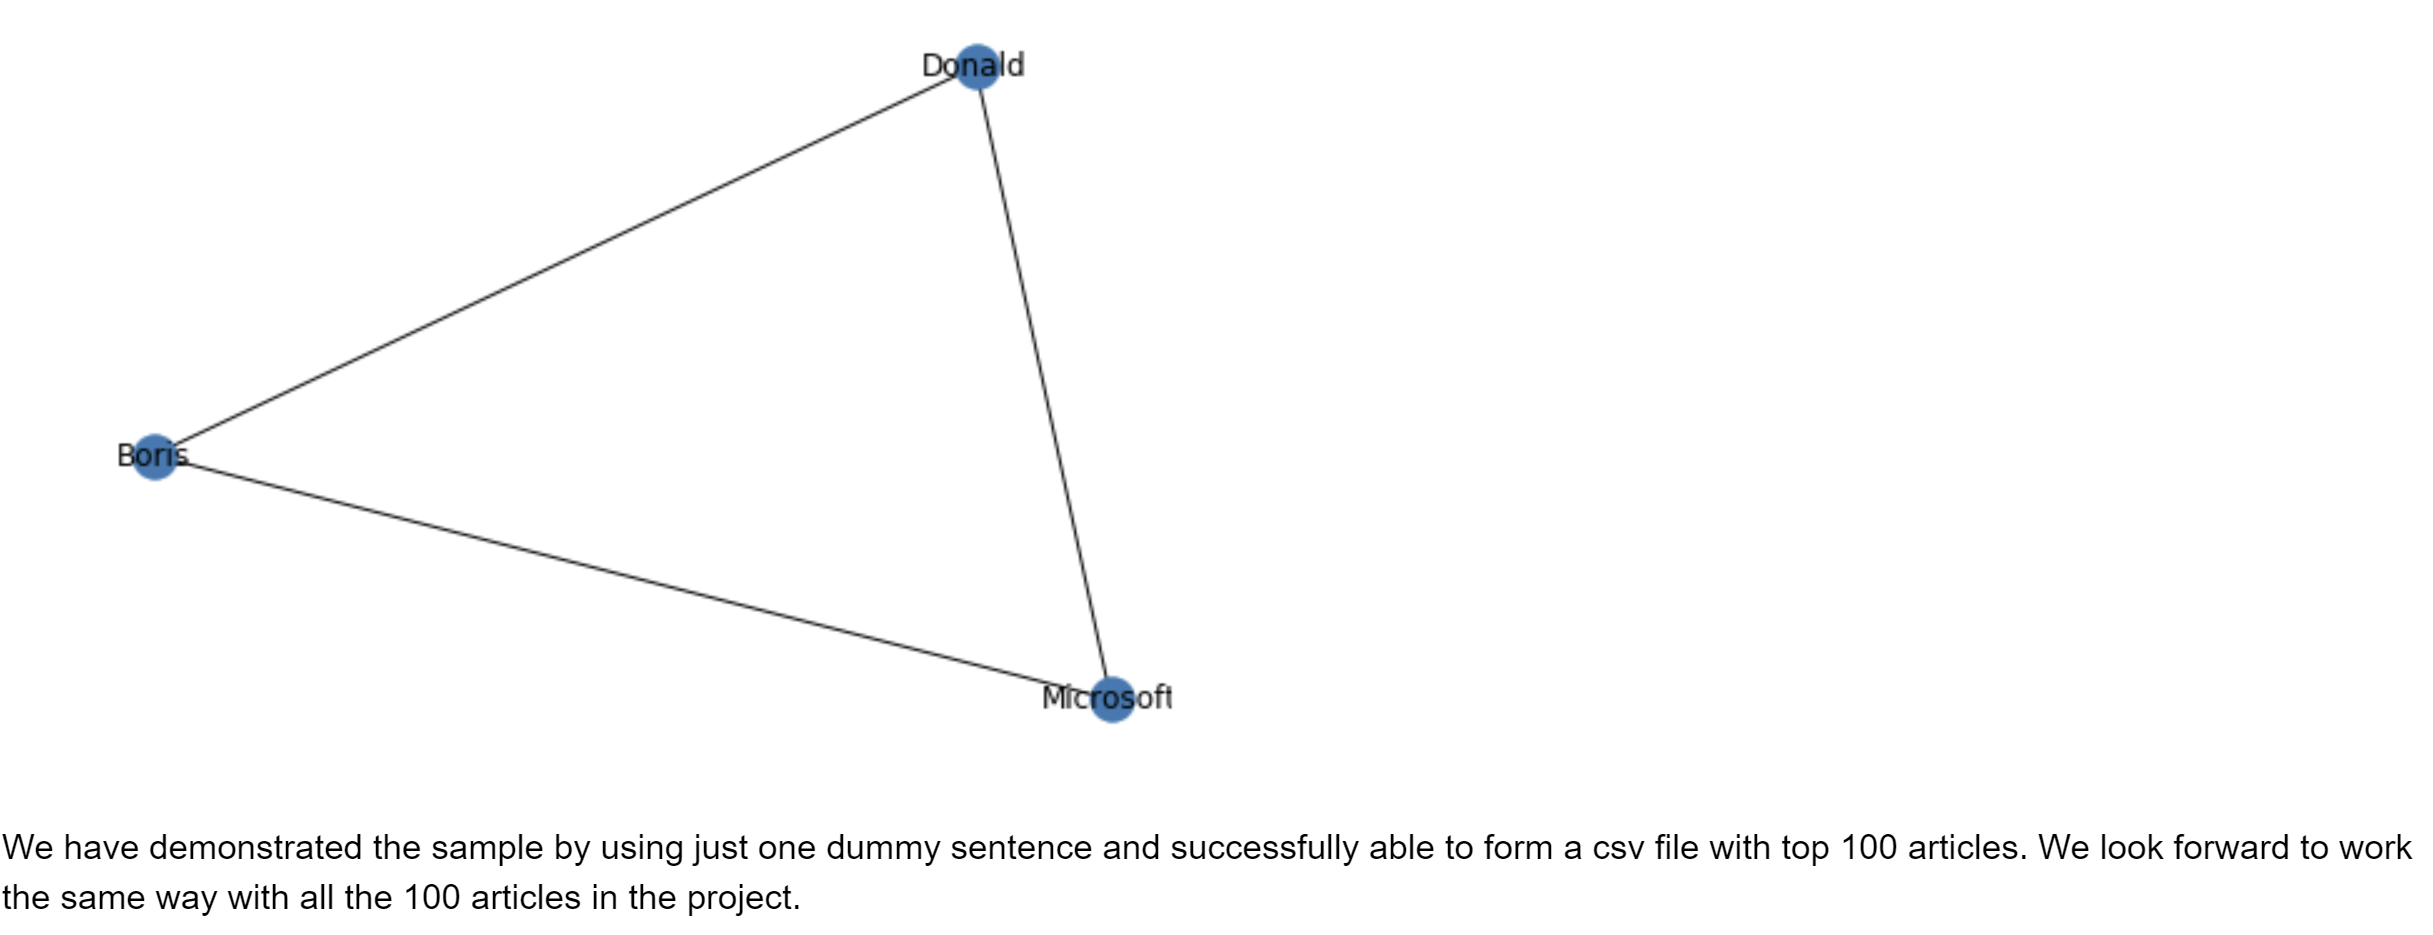



#### 2. Business Problem from the project:


We aim to build a network analysis where we could answer the questions like


#### * Who are the most influential individuals on the news?


To find the nodes(individuals) who are influencing news network the most by appearing more number of times in the news throughtout all the channels. Here we would look for eigenvector centrality of the nodes.


#### * Does Everyone Know Each Other in the Network?


To see if everyone in the network knows every other node in the network. Which is similar to concept of connected graph. If a graph is connected then we infer that every node in a network knows every other node in the network. So, for this we will check if the network is connected or not.


#### * How is one person in news related to another person in another news article?

We are to visualize how one person(node) in news related to another person(node) in another news article in the whole network . We will first see how these two nodes are connected through shortest distance and then filtering out the common articles they were mentioned on.

## Below Is The Packages Which Will Be Used

### 1. Importing  Packages

In [1]:
#Importing Libraries
import os
import numpy
import pandas as pd
import seaborn as sns
import re
from goose3 import Goose
# load Flair and NLTK
import torch
from flair.data import Sentence
from flair.models import SequenceTagger
from nltk import tokenize
import networkx as nx
from itertools import combinations, product
import string
import nltk

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm


## Building and Creating The Required Data

## 1.   Data collection:

The source we used was from the GDELT Project, which is a free, open platform of all world events, monitored in real time from across the globe. The GDELT Project monitors the world’s broadcast, print, and web news from nearly every corner of every country in over 100 languages.

We have fetched their raw data, which they also make available completely free of charge. They publish daily CSVs with thousands of events which occurred during that day, but more importantly, they include the URL of the news source which reported on the event.

We have used the file containing the events that had ocurred on the 23rd of April and extracted the top 800 articles around the globe. We had limited the search in a way to narrow down the volume of entities.

The type of raw data we got contained the sources, source urls with the date it was published on and other fields like Tone, Organization etc. But according to our requirement, we needed to extract the content from each source urls to get the content of the news.

#### To achieve this we had performed the below task:

###### Library used for extracting content from each source url is : GOOSE

The aim of the GOOSE is to take any news article or article-type web page and not only extract what is the main body of the article but also all meta data.


### Reading the Raw data which is collected from the Data Path and displaying the top 5 rows:

In [2]:
DATA_DIRECTORY = './data/'
FILE_ONE = '20200423.gkg.csv'
FILE_ONE_PATH = DATA_DIRECTORY + FILE_ONE
df_file_one = pd.read_csv(FILE_ONE_PATH, sep = '\t')
df_file_one.head()

,NUMARTS,COUNTS,THEMES,LOCATIONS,PERSONS,ORGANIZATIONS,TONE,CAMEOEVENTIDS,SOURCES,SOURCEURLS
0,2,NaN,NaN,"2#Alabama, United States#US#USAL#32.799#-86.80...",javon kinlaw;clemson a j terrell;desmond trufa...,young;espn,"-1.7293997965412,1.93285859613428,3.6622583926...",NaN,espn.com;espn.com,https://www.espn.com/blog/atlanta-falcons/post...
1,1,NaN,TAX_ETHNICITY;TAX_ETHNICITY_ITALIAN;TAX_WORLDL...,"2#New York, United States#US#USNY#42.1497#-74....",william fisher;kristin fisher,instagram;texas medical center;league city,"-2.05128205128205,2.30769230769231,4.358974358...","919758687,919758695,919758696,919759218,919759...",houstoniamag.com,https://www.houstoniamag.com/coronavirus/2020/...
2,1,NaN,SOC_POINTSOFINTEREST;SOC_POINTSOFINTEREST_AIRP...,"4#Kuala Lumpur, Kuala Lumpur, Malaysia#MY#MY14...",wisma putra;mohd shukrie;queen elizabeth,kl international airport,"1,4.33333333333333,3.33333333333333,7.66666666...",919783853,theedgemarkets.com,https://www.theedgemarkets.com/article/mahb-do...
3,1,NaN,LEADER;TAX_FNCACT;TAX_FNCACT_GOVERNOR;CRISISLE...,"4#Salisbury, Mashonaland East, Zimbabwe#ZI#ZI0...",scott gensler,NaN,"1.01694915254237,2.03389830508475,1.0169491525...",NaN,wifr.com,https://www.wifr.com/content/news/Illinois-gar...
4,1,AFFECT#19##1#Spain#SP#SP#40#-4#SP;CRISISLEX_T0...,TAX_FNCACT;TAX_FNCACT_SENATOR;USPEC_POLITICS_G...,"4#Manila, Manila, Philippines#RP#RPD9#14.6042#...",panfilo lacson;rodrigo duterte,NaN,"-1.14155251141553,2.28310502283105,3.424657534...",NaN,inquirer.net,https://newsinfo.inquirer.net/1263337/lacson-o...


### 1.2 Data Extraction:

Here we are going to perform the extraction of the data from the old DataFrame into the new DataFrame.

Where, we will be extracting the Title, Meta description, domain and the content of each article. This allows us to organise the data into a nice pandas DataFrame.

For this the first step we perform is:

#### 1. Creating empty dataframe

In [6]:
#Getting data for only required columns
df_cleaned = pd.DataFrame(columns=['url','title','meta_description','domain','content'])
df_cleaned

,url,title,meta_description,domain,content


#### 2. Fectching the data for only the required columns created above.

In [ ]:
    '''
    The below code iterates over 800 url and fetchs the data
    and finally loads the data into a dataframe.
    
    The final result is a dataframe with news text from the
    urls
    
    '''
    count = 0
    with Goose() as g:
        for url in df_file_one['SOURCEURLS']:
            count += 1
            if count < 800:
                try:
                    article = g.extract(url=url)
                    df_cleaned=df_cleaned.append(
                        {
                            'url' : url , 
                            'title' : article.title,
                            'meta_description':article.meta_description,
                            'domain':article.domain,
                            'content':article.cleaned_text
                        }, ignore_index=True)
                except:
                    continue
            else:
                break

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


### 1.3 Data Transformation:

Here we are going to perform the transformation of the data from the old DataFrame into the new DataFrame.

Based on the data extracted above, where we haveextracting the Title, Meta description, domain and the content of each article. 

This allows us to organise the data into a nice pandas DataFrame. 

Below we can see the top 5 rows from the New Cleaned DataFrame created.

In [7]:
#Testing if data is successfully loaded
df_cleaned.head() 

,url,title,meta_description,domain,content
0,https://www.espn.com/blog/atlanta-falcons/post...,"Trade or not, Falcons can't afford first-round...",Moving into the top 5 would be difficult for t...,www.espn.com,Kevin Negandhi dives into the careers of the t...
1,https://www.houstoniamag.com/coronavirus/2020/...,A Local E.R. Doctor and Former Astronaut Talks...,"Dr. William Fisher, a former astronaut and fat...",www.houstoniamag.com,"A few weeks ago, we spoke to an Italian doctor..."
2,https://www.theedgemarkets.com/article/mahb-do...,MAHB donates comfort kits to front liners at H...,KUALA LUMPUR (April 23): Malaysia Airports Bhd...,www.theedgemarkets.com,KUALA LUMPUR (April 23): Malaysia Airports Bhd...
3,https://www.wifr.com/content/news/Illinois-gar...,Illinois garden centers to reopen in May,Garden centers across the state get the green ...,www.wifr.com,Garden centers in the region celebrate as Gove...
4,https://newsinfo.inquirer.net/1263337/lacson-o...,Lacson on P10M ‘reward’ for COVID-19 vaccine: ...,Why not invest more in the country’s research ...,newsinfo.inquirer.net,"MANILA, Philippines — Why not invest more in t..."


#### Checking the shape of the DataFrame created

In [8]:
#Checking the number of rows and columns 
df_cleaned.shape

(779, 5)

### 1.4 Saving the New Created Dataset:

The new created dataframe with top 800 Articles around the globe is stored in the below csv file for further work and Analysis.

It is saved in the FILE NAME: 800Articles.csv

In [31]:
#Its better to save the extracted dataset, since it takes an incredible amoount of time to extract again.
df_cleaned.to_csv('./data/800Articles.csv')

## 2. Load The New Data:

In [3]:
df_cleaned=pd.read_csv('./data/800Articles.csv').drop(['Unnamed: 0'],axis=1)
df_cleaned = df_cleaned.drop(['Unnamed: 0.1'],axis=1)

In [4]:
df_cleaned.head()

,url,title,meta_description,domain,content
0,https://www.espn.com/blog/atlanta-falcons/post...,"Trade or not, Falcons can't afford first-round...",Moving into the top 5 would be difficult for t...,www.espn.com,Kevin Negandhi dives into the careers of the t...
1,https://www.houstoniamag.com/coronavirus/2020/...,A Local E.R. Doctor and Former Astronaut Talks...,"Dr. William Fisher, a former astronaut and fat...",www.houstoniamag.com,"A few weeks ago, we spoke to an Italian doctor..."
2,https://www.theedgemarkets.com/article/mahb-do...,MAHB donates comfort kits to front liners at H...,KUALA LUMPUR (April 23): Malaysia Airports Bhd...,www.theedgemarkets.com,KUALA LUMPUR (April 23): Malaysia Airports Bhd...
3,https://www.wifr.com/content/news/Illinois-gar...,Illinois garden centers to reopen in May,Garden centers across the state get the green ...,www.wifr.com,Garden centers in the region celebrate as Gove...
4,https://newsinfo.inquirer.net/1263337/lacson-o...,Lacson on P10M ‘reward’ for COVID-19 vaccine: ...,Why not invest more in the country’s research ...,newsinfo.inquirer.net,"MANILA, Philippines — Why not invest more in t..."


### 2.1 Attributes Explanation:

URL : Describes the source url from which the news article has been collected.

TITLE : Headline of the news

META_DESCRIPTION : Gives a high level description about the news article

DOMAIN : Gives the domain details of the news article i.e. to which news channel it belongs to and their domain.

CONTENT : describes the news in detail.

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   url               779 non-null    object
 1   title             763 non-null    object
 2   meta_description  577 non-null    object
 3   domain            779 non-null    object
 4   content           748 non-null    object
dtypes: object(5)
memory usage: 30.6+ KB


#### 2.1.1 Taking the top 20 data and getting us the count of occurences of each of the unique values in the domain column.

This shows us the unique domain i.e. how many times a news article has been collected from a single domain

In [12]:
df_cleaned['domain'].value_counts()[:20]

allafrica.com                  8
www.business-standard.com      6
www.finanznachrichten.de       6
uk.reuters.com                 6
www.daijiworld.com             5
in.reuters.com                 5
www.prweb.com                  5
www.dailymail.co.uk            4
tribune.com.pk                 4
www.stltoday.com               4
www.cbc.ca                     4
www.hindustantimes.com         4
www.thestar.com.my             4
timesofindia.indiatimes.com    4
www.sfgate.com                 4
nypost.com                     4
freerepublic.com               4
news.yahoo.com                 4
www.nytimes.com                3
www.washingtonpost.com         3
Name: domain, dtype: int64

Text(0.5, 1.0, 'Number of articles')

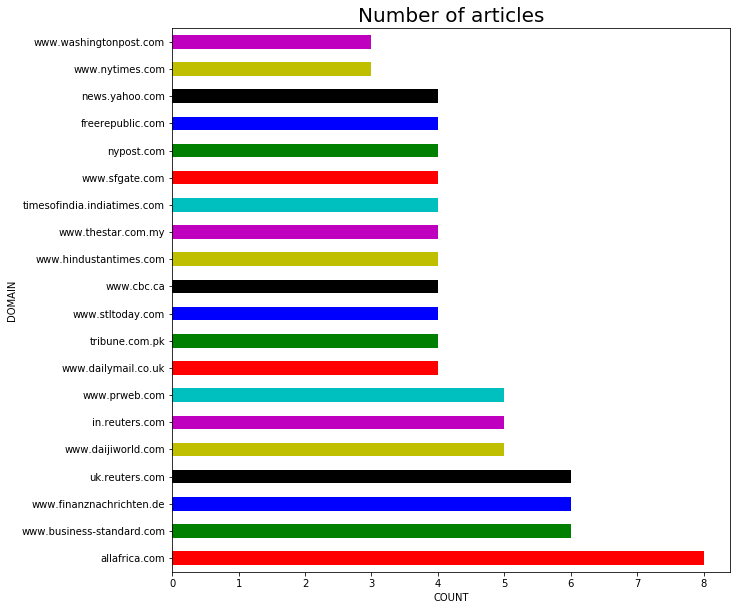

In [11]:
df_cleaned['domain'].value_counts()[:20].plot(kind='barh',figsize=(10, 10),color = list('rgbkymc'))
plt.xlabel("COUNT", fontsize = 10)
plt.ylabel("DOMAIN", fontsize = 10)
#plt.grid()
plt.title("Number of articles", fontsize=20)

# 3. Methodology:

#### Recognising The Entities:

##### Flair library:

It provides state-of-the-art NLP solutions in a few lines of code. Flair uses a neural language model (Akbik et al., 2018) to assign tags to text data, beating most previous models’ accuracy in the process.



Named Entity Recognition is a Natural Language Processing task for extracting information from text; as the name suggests, it recognises entities, such as proper nouns within unstructured data. It achieves this using statistical models trained on large corpora of documents; the model learns to recognise and categorise entities based on the context in which they appear as words. We’ll use one of these models to list, for each article, words tagged as persons and organisations by the model.

    - function to extract named entities from a paragraph
    - returns two data frames:
        - the first is a dataframe of all unique entities (persons and orgs)
        - the second is the links between the entities

# Creating the links and the Entities for Further Analysis of the Graph:

## 4. Load The Flair NER model:

In [11]:
'''
The is the langauage model used by flair to classify
word entity type

'''

tagger = SequenceTagger.load('ner')

2020-06-02 18:34:47,062 loading file /Users/asthajain/.flair/models/en-ner-conll03-v0.4.pt


### 4.1 Remove pronouns

Here we are removing the articles in a sentence. Like in order to make our results today PER or ORG entities we need to remove 
pronouns we use to call them. This is done only to get Person and Organisation entites. This dataframe generated here will be used against ner dataframe to remove this pronouns.

In [12]:
pronouns = ['I', 'You', 'It', 'He', 'She', 'We', 'They']
suffixes = ["", "’m", "’re", "’s", "’ve", "’d", "'m", "'re", "'s", "'ve", "'d", "m", "re", "s", "ve", "d"]

contraptions = [(p, s) for p in pronouns for s in suffixes]

df_contraptions = pd.DataFrame(contraptions, columns=['pronoun', 'suffix'])

df_contraptions['contraption'] = df_contraptions.apply(lambda x: x['pronoun'] + x['suffix'], axis=1)

contraptions = df_contraptions.contraption.values

### 4.2 Define NER function

We use this function to create the ner data file which consists of the following columns:

entity - This contains the words that has been collected.

type - This gives the details whether the details collected are persons or an organisation.

entity_cl - This gives the details about what class does the entity belong too.

date -  Date of the entity created

#### The description of the below function:


1. Remove newlines and odd characters
    
   Here we used regex module of python ('re') to remove newlines, carraige return quotes with space.
   This is done because this characters do not add any value to our analysis
   
   
2. Text Tokenization

    We did text tokenization in order remove pronouns. 
    
    
3. Predict named entities

    The tagger class of the flair module taken in the list of words we tokenized earlier 
    and generates entities for the words
    
 
4. collect sentence NER's to list of dictionaries

    The genarated words and entity types are stored in a list of dictinoary
    

5. collect entities and types

    Here we separated the entities and entity type from the dict to a list so we can add them to dataframe at later point
    
    
6. create dataframe of entities (nodes)

    Since we are only interested in Persons and organisations in our anaysis the in this block creates a new
    dataframe to load words and entities of type PER and ORG. Here we also remove pronouns based on the list we 
    created earlier.
    

The final result of this function is a tuple of dataframes contains word and its entity type in one dataframe
another dataframe containing the relationships among themselves.



In [13]:

def get_ner_data(paragraph):
    '''
    - function to extract named entities from a paragraph
    - returns two data frames:
        - the first is a dataframe of all unique entities (persons and orgs)
        - the second is the links between the entities
    '''
    
    # remove newlines and odd characters
    paragraph = re.sub('\r', '', paragraph)
    paragraph = re.sub('\n', ' ', paragraph)
    paragraph = re.sub("'s", '', paragraph)
    paragraph = re.sub("“", '', paragraph)
    paragraph = re.sub("”", '', paragraph)
    paragraph = re.sub("’s", '', paragraph)
    
    # tokenise sentences
    sentences = tokenize.sent_tokenize(paragraph)
    sentences = [Sentence(sent) for sent in sentences]
    
    # predict named entities
    for sent in sentences:
        tagger.predict(sent)
    
    # collect sentence NER's to list of dictionaries
    sent_dicts = [sentence.to_dict(tag_type='ner') for sentence in sentences]
    
    # collect entities and types
    entities = []
    types = []
    for sent_dict in sent_dicts:
        entities.extend([entity['text'] for entity in sent_dict['entities']])
        types.extend([entity['type'] for entity in sent_dict['entities']])
    
    # create dataframe of entities (nodes)
    df_ner = pd.DataFrame(data={'entity': entities, 'type': types})        
    df_ner = df_ner[df_ner['type'].isin(['PER', 'ORG'])]
    df_ner = df_ner[df_ner['entity'].map(lambda x: isinstance(x, str))]
    df_ner = df_ner[~df_ner['entity'].isin(df_contraptions['contraption'].values)]
    df_ner['entity'] = df_ner['entity'].map(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    df_ner['entity'] = df_ner.apply(lambda x: x['entity'].split(' ')[len(x['entity'].split(' '))-1] if x['type']=='PER' else x['entity'], axis=1)
    df_ner = df_ner.drop_duplicates().sort_values('entity')
    # get entity combinations
    combs = list(combinations(df_ner['entity'], 2))
    
    # create dataframe of relationships (edges)
    df_links = pd.DataFrame(data=combs, columns=['from', 'to'])
    
    return df_ner, df_links

### 4.3 Applying the function on the dataset

In [15]:
#Copied data to another dataframe for data manuplation
df_day = df_cleaned[['domain', 'title', 'content']]
df_day

,domain,title,content
0,www.espn.com,"Trade or not, Falcons can't afford first-round...",Kevin Negandhi dives into the careers of the t...
1,www.houstoniamag.com,A Local E.R. Doctor and Former Astronaut Talks...,"A few weeks ago, we spoke to an Italian doctor..."
2,www.theedgemarkets.com,MAHB donates comfort kits to front liners at H...,KUALA LUMPUR (April 23): Malaysia Airports Bhd...
3,www.wifr.com,Illinois garden centers to reopen in May,Garden centers in the region celebrate as Gove...
4,newsinfo.inquirer.net,Lacson on P10M ‘reward’ for COVID-19 vaccine: ...,"MANILA, Philippines — Why not invest more in t..."
...,...,...,...
774,www.abc15.com,Navajo Nation joins other tribes in lawsuit qu...,The President of the Navajo Nation said Wednes...
775,www.nhregister.com,Article - New Haven Register,The item that you have requested was not found...
776,www.ivpressonline.com,404 Error,"Sorry, the page you're looking for cannot be f..."
777,thespun.com,North Carolina Freshman Guard Announces He's T...,Jeremiah Francis was a member of North Carolin...



The belows codes takes news text from the content column and does apply ner function we created earlier and appends the result of each iteration to ner and links dataframes

In [15]:
from tqdm import tqdm
df_ner = pd.DataFrame()
df_links = pd.DataFrame()

for content in tqdm(df_day['content']):
  try:
    df_ner_temp, df_links_temp = get_ner_data(content)
    df_ner = df_ner.append(df_ner_temp)
    df_links = df_links.append(df_links_temp)
  except:
    continue

100%|██████████| 779/779 [2:07:36<00:00,  9.83s/it]  


### 4.4 Remove plurals and possessives

Here we are checking for the entities having same name with singular and plural form. Since, they differ in the singularity and plurality it is being considered as two different named entities which we do not want. And also we are considering the entities based on their last name, as often individuals are referred by their last name. Hence, we are removing the duplicate entities with the difference in singular and plural and also because of their lastname they are not considered as two different entities but as one single enity.

In [16]:
df_links = pd.read_csv('./data/df_links.csv')

In [48]:
def remove_s(entity, entity_series):
  if (entity[-1] == 's') & (entity[:-1] in entity_series):
    return entity[:-1]
  else:
    return entity

In [49]:
df_links['to'] = df_links['to'].map(lambda x: remove_s(x, df_ner['entity'].values))
df_links['from'] = df_links['from'].map(lambda x: remove_s(x, df_ner['entity'].values))
df_ner['entity_cl'] = df_ner['entity'].map(lambda x: remove_s(x, df_ner['entity'].values))

In [17]:
df_links

,from,to,weight
0,49ers,Buc,2
1,49ers,Colts,2
2,49ers,Cook,2
3,49ers,Garoppolo,2
4,49ers,Jr,2
...,...,...,...
5080,Wijnaldum,Winks,2
5081,Wijnaldum,Xhaka,2
5082,Wilson,Young,2
5083,Xhaka,​Arsenal,2


## 5. Exporting the Data Created above:

The data which has been created above are exported into two datafiles namely : "df_links.csv" and "df_ner.csv". This helps us in loading the cleaned dataset which consists details of the links, weights , entities for further analysis of the graph.

In [37]:
#Exporting data for further analysis
df_links.to_csv('./data/df_links.csv', index=False)

In [21]:
#Exporting data for further analysis
df_ner.to_csv('./data/df_ner.csv', index=False)

### Next we move on to the Jupyter file showing the Graph Analysis for Visualization purpose.

FileName : Data Mining from the News and building a Network Analysis_Data Visualization.ipynb